### HOMEWORK_2

## Petrosyan Sargis

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv("weather-check.csv")

In [100]:
data.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [101]:
grouptable_2 = pd.crosstab(data["US Region"],
            data["If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?"],
            dropna = False,
            margins = True
           )
grouptable_2 = grouptable_2.iloc[:-1, :-1]
grouptable_2 = grouptable_2.iloc[1:,1:]

grouptable_2

"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
US Region,,,,
East North Central,38,10,63,30
East South Central,11,6,16,8
Middle Atlantic,23,8,45,28
Mountain,19,7,28,18
New England,16,4,22,10
Pacific,67,18,55,45
South Atlantic,47,8,74,25
West North Central,21,3,18,12
West South Central,25,7,37,25


In [102]:
grouptable_2 = grouptable_2[['Very unlikely', 'Somewhat unlikely', 'Somewhat likely', 'Very likely']]
grouptable_2

"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Very unlikely,Somewhat unlikely,Somewhat likely,Very likely
US Region,,,,
East North Central,30,10,38,63
East South Central,8,6,11,16
Middle Atlantic,28,8,23,45
Mountain,18,7,19,28
New England,10,4,16,22
Pacific,45,18,67,55
South Atlantic,25,8,47,74
West North Central,12,3,21,18
West South Central,25,7,25,37


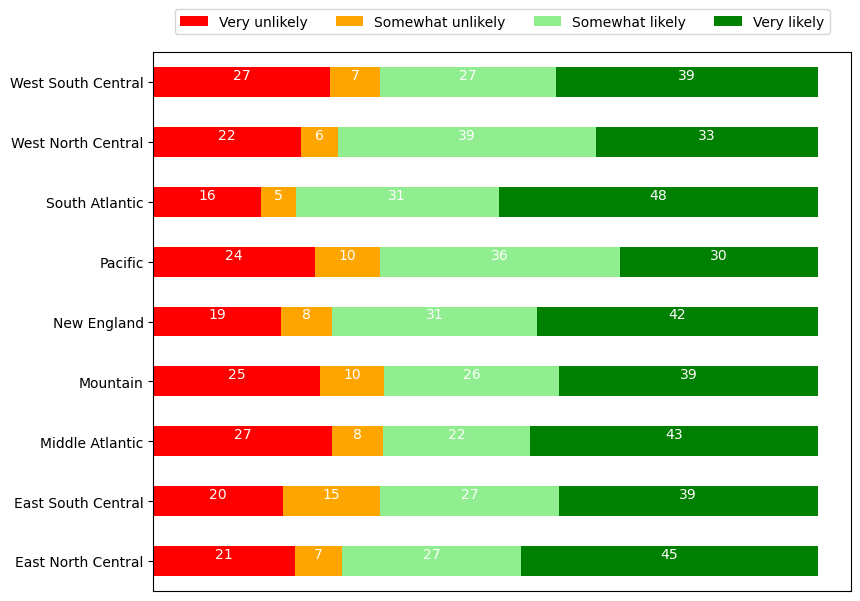

In [103]:
row_percentages = grouptable_2.div(grouptable_2.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(9, 7))
row_percentages.plot.barh(stacked=True, ax=ax, color=['red', 'orange', 'lightgreen', 'green'])

ax.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', ncol=len(grouptable_2.columns))
ax.set_ylim(-0.5, len(grouptable_2) - 0.5)


ax.set_ylabel("")

for region_index, (region, percentages) in enumerate(row_percentages.iterrows()):
    cum_sum = 0  
    for category_index, percentage in enumerate(percentages):
        x_value = cum_sum + (percentage / 2)
        ax.annotate(f"{percentage:.0f}", 
                    (x_value, region_index),
                    ha='center', va='center', xytext=(0, 5), color ="w", textcoords='offset points')
        cum_sum += percentage
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

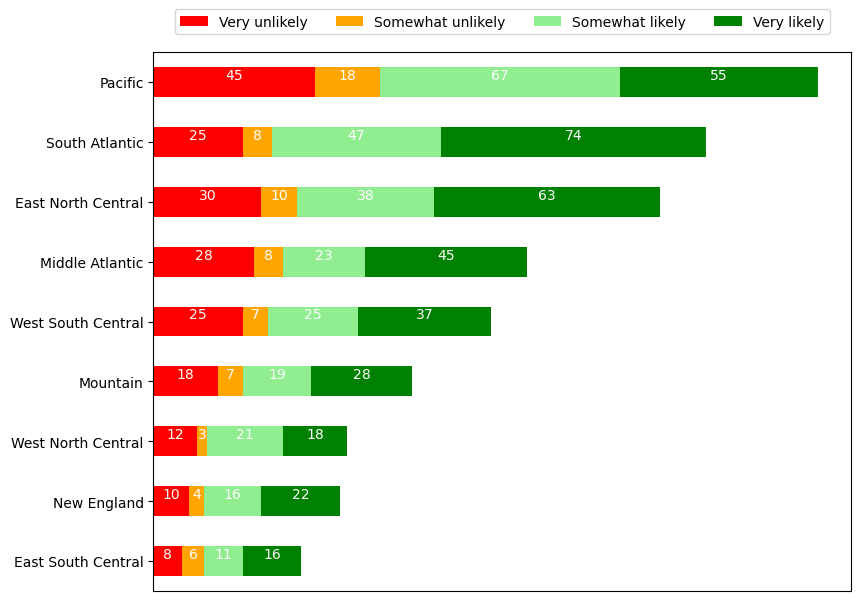

In [104]:
fig, ax = plt.subplots(figsize=(9, 7))
row_values = grouptable_2

row_values_sorted = row_values.loc[row_values.sum(axis=1).sort_values(ascending=True).index]

row_values_sorted.plot.barh(stacked=True, ax=ax, color=['red', 'orange', 'lightgreen', 'green'])

ax.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', ncol=len(grouptable_2.columns))
ax.set_ylim(-0.5, len(grouptable_2) - 0.5)
ax.set_ylabel("")

for age_index, (age, values) in enumerate(row_values_sorted.iterrows()):
    cum_sum = 0  
    for category_index, value in enumerate(values):
        x_value = cum_sum + (value / 2)
        ax.annotate(f"{int(value)}", 
                    (x_value, age_index),
                    ha='center', va='center', xytext=(0, 5), color="w", textcoords='offset points')
        cum_sum += value

plt.tick_params(bottom=False, labelbottom=False)
plt.show()

In [105]:
grouptable_1 = pd.crosstab(data["Age"],
            data["If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?"],
            dropna = False,
            margins = True
           )
grouptable_1 = grouptable_1.iloc[:-1, :-1]
grouptable_1 = grouptable_1.iloc[1:,1:]

grouptable_1

"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
Age,,,,
18 - 29,61,11,68,36
30 - 44,68,14,71,51
45 - 59,73,20,128,57
60+,71,28,95,64


In [106]:
grouptable_1 = grouptable_1[['Very unlikely', 'Somewhat unlikely', 'Somewhat likely', 'Very likely']]
grouptable_1

"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Very unlikely,Somewhat unlikely,Somewhat likely,Very likely
Age,,,,
18 - 29,36,11,61,68
30 - 44,51,14,68,71
45 - 59,57,20,73,128
60+,64,28,71,95


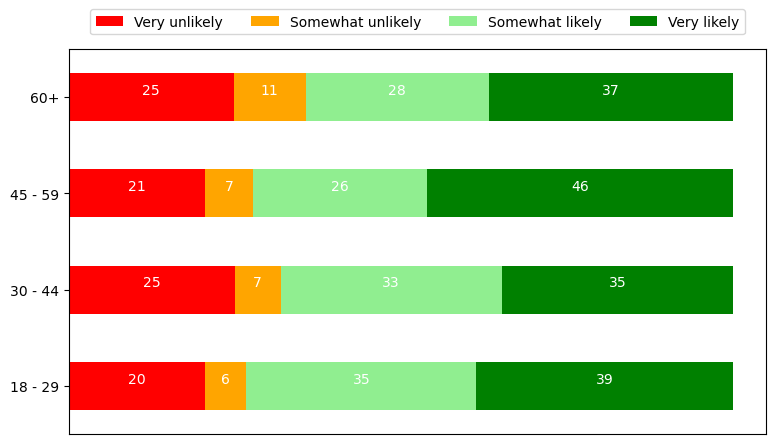

In [107]:
row_percentages = grouptable_1.div(grouptable_1.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(9, 5))
row_percentages.plot.barh(stacked=True, ax=ax, color=['red', 'orange', 'lightgreen', 'green'])

ax.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', ncol=len(grouptable_1.columns))
ax.set_ylim(-0.5, len(grouptable_1) - 0.5)


ax.set_ylabel("")

for age_index, (age, percentages) in enumerate(row_percentages.iterrows()):
    cum_sum = 0  
    for category_index, percentage in enumerate(percentages):
        x_value = cum_sum + (percentage / 2)
        ax.annotate(f"{percentage:.0f}", 
                    (x_value, age_index),
                    ha='center', va='center', xytext=(0, 5), color ="w", textcoords='offset points')
        cum_sum += percentage
plt.tick_params(bottom=False, labelbottom=False)
plt.show()

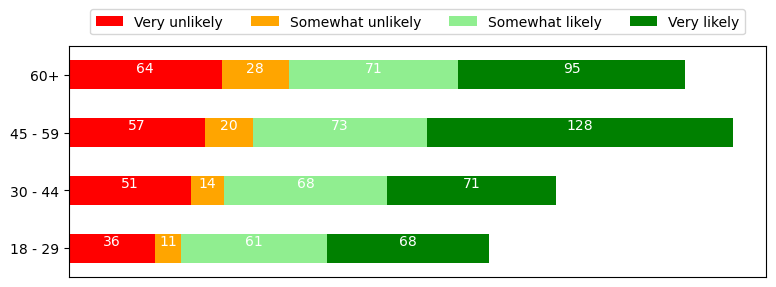

In [108]:
row_values = grouptable_1

fig, ax = plt.subplots(figsize=(9, 3))
row_values.plot.barh(stacked=True, ax=ax, color=['red', 'orange', 'lightgreen', 'green'])

ax.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', ncol=len(grouptable_1.columns))
ax.set_ylim(-0.5, len(grouptable_1) - 0.5)

ax.set_ylabel("")

for age_index, (age, values) in enumerate(row_values.iterrows()):
     cum_sum = 0  
     for category_index, value in enumerate(values):
         x_value = cum_sum + (value / 2)
         ax.annotate(f"{int(value)}", 
                     (x_value, age_index),
                     ha='center', va='center', xytext=(0, 5), color="w", textcoords='offset points')
         cum_sum += value

plt.tick_params(bottom=False, labelbottom=False)
plt.show()